# Predikcija cijena avio karata - model

Ovaj Python kod koristi Random Forest regressor za predikciju cijena avio karata. Podaci se učitavaju, pripremaju (uklanjaju nepotrebne kolone, kodiraju kategorijske varijable), a zatim se dijele na trening i test skupove. Model se trenira, evaluira i vrši predikcije, pri čemu se negativne predikcije postavljaju na nulu. Na kraju, model se sprema za buduću upotrebu.

**Potrebne biblioteke:** pip install pandas matplotlib scikit-learn numpy pickle-mixin

## Učitavanje potrebnih biblioteka

- import pandas as pd: Učitava biblioteku Pandas koja se koristi za rad sa podacima u obliku tablica jer se korisi .csv file.
- import matplotlib.pyplot as plt: Učitava biblioteku Matplotlib koja omogućava kreiranje vizualizacija podataka.
- plt.style.use('ggplot'): Postavlja stil grafova na 'ggplot'
- %matplotlib inline: Omogućava prikazivanje grafova unutar Jupyter notebook-a.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Učitavanje podataka

Učitava se Clean_Dataset.csv u Pandas DataFrame objekat df i prikazuje se prvih 5 redova učitanog DataFrame-a kako bi se mogli analizirati podaci prije treniranja.

In [3]:
df = pd.read_csv('data/Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## Provjera dimenzija i uklanjanje nepotrebnih kolona

Provjera dimenzija (broj redova i kolona) skupa podataka. Uklanjaju se tri kolone jer nisu potrebne (Unnamed: 0, flight, i duration) iz DataFrame-a. Parametar axis=1 označava da se brišu kolone (a ne redovi). inplace=True znači da se promjene izvršavaju direktno u originalnom DataFrame-u bez potrebe za stvaranjem nove varijable.

In [4]:
df.shape
df.drop(['Unnamed: 0', 'flight', 'duration'], axis=1, inplace=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   airline           300153 non-null  object
 1   source_city       300153 non-null  object
 2   departure_time    300153 non-null  object
 3   stops             300153 non-null  object
 4   arrival_time      300153 non-null  object
 5   destination_city  300153 non-null  object
 6   class             300153 non-null  object
 7   days_left         300153 non-null  int64 
 8   price             300153 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 20.6+ MB


## Analiza po avio kompaniji

Prikazuju se sve jedinstvene vrijednosti koje se nalaze u koloni airline. Ovo se koristi za provjeru svih različitih aviokompanija koje se nalaze u skupu podataka.
- df.groupby('airline')['price'].mean(): Grupira podatke po koloni airline i za svaku grupu (aviokompaniju) izračunava prosječnu cijenu (price).
- sort_values(): Sortira prosječne cijene po vrijednostima (od najniže do najviše).
- plot(kind='bar'): Vizualizuje ove prosječne cijene kao bar grafikon, gdje će svaka aviokompanija biti predstavljena sa stupcem koji prikazuje prosječnu cijenu.

<Axes: xlabel='airline'>

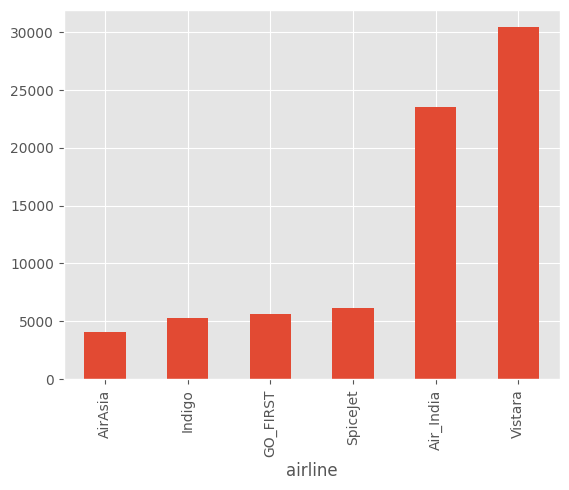

In [5]:
df['airline'].unique()
df.groupby('airline')['price'].mean().sort_values().plot(kind='bar')

## Analiza cijena po klasi

Prikazuju se sve jedinstvene vrijednosti koje se nalaze u koloni class, koja označava tip klase (npr. Ekonomija, Biznis). Ovo se koristi kako bi se utvrdilo koje sve klase postoje u skupu podataka.

- df[df['class'] == 'Economy']: Filtrira podatke tako da zadrži samo one redove u kojima je class postavljeno na Economy.
- groupby('airline')['price'].mean(): Grupira filtrirane podatke po airline (aviokompaniji) i izračunava prosječnu cijenu za svaki tip aviokompanije u ekonomskom razredu.
- sort_values(): Sortira prosječne cijene po vrijednostima (od najniže do najviše).
- plot(kind='bar'): Vizualizuje ove prosječne cijene kao bar grafikon (stupčasti grafikon), gdje će svaka aviokompanija biti predstavljena sa stupcem koji prikazuje prosječnu cijenu za ekonomsku klasu.
***
- df[df['class'] == 'Business']: Filtrira podatke tako da zadrži samo one redove u kojima je class postavljeno na Business.
- groupby('airline')['price'].mean(): Grupira filtrirane podatke po airline (aviokompaniji) i izračunava prosječnu cijenu za svaki tip aviokompanije u poslovnoj klasi.
- sort_values(): Sortira prosječne cijene po vrijednostima (od najniže do najviše).
- plot(kind='bar'): Vizualizuje ove prosječne cijene kao bar grafikon, gdje će svaka aviokompanija biti predstavljena sa stupcem koji prikazuje prosječnu cijenu za poslovnu klasu.

<Axes: xlabel='airline'>

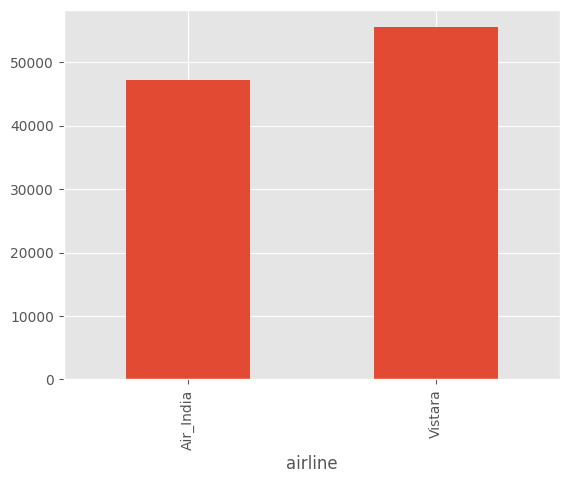

In [6]:
df['class'].unique()
df[df['class'] == 'Economy'].groupby('airline')['price'].mean().sort_values().plot(kind='bar')
df[df['class'] == 'Business'].groupby('airline')['price'].mean().sort_values().plot(kind='bar')

## Kategorijske varijable

- df['airline']: Ovdje se koristi kolona airline iz DataFrame-a, koja sadrži nazive aviokompanija.
- map(): Funkcija map() se koristi za zamjenu vrijednosti u kolonama na osnovu mape koju definišemo. U ovom slučaju, svaka aviokompanija u airline koloni bit će zamijenjena odgovarajućom numeričkom vrijednošću prema definisanoj mapi:
    - 'AirAsia' se mijenja u 0
    - 'Indigo' se mijenja u 1
    - 'GO_FIRST' se mijenja u 2
    - 'SpiceJet' se mijenja u 3
    - 'Air_India' se mijenja u 4
    - 'Vistara' se mijenja u 5

Ova zamjena omogućava da se nazivi aviokompanija (koji su tekstualni podaci) konvertuju u numeričke vrijednosti, što je potrebno za dalju analizu i modeliranje podataka.

- df.head(): Prikazuje prvih 5 redova DataFrame-a nakon što su izmijenjene vrijednosti u airline koloni. Ovo omogućava pregled izgleda podataka nakon što su izvršene promjene, a prije treniranja.

In [7]:
df['airline'] = df['airline'].map({'AirAsia': 0, 'Indigo': 1, 'GO_FIRST': 2, 'SpiceJet': 3, 'Air_India': 4, 'Vistara': 5})
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,3,Delhi,Evening,zero,Night,Mumbai,Economy,1,5953
1,3,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,5953
2,0,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,5956
3,5,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,5955
4,5,Delhi,Morning,zero,Morning,Mumbai,Economy,1,5955


## Gradovi

- df['source_city']: Ovdje se koristi kolona source_city iz DataFrame-a koja sadrži nazive gradova odakle polazi let.
- map(): Funkcija map() zamjenjuje tekstualne nazive gradova odgovarajućim numeričkim vrijednostima prema definisanoj mapi:
    - 'Delhi' se mijenja u 0
    - 'Hyderabad' se mijenja u 1
    - 'Bangalore' se mijenja u 2
    - 'Mumbai' se mijenja u 3
    - 'Kolkata' se mijenja u 4
    - 'Chennai' se mijenja u 5
Na taj način, gradovi se numerički kodiraju kako bi se model mogao trenirati.
***
- Slično kao i prethodno, funkcija map() se koristi za numeričko kodiranje gradova odredišta na isti način:
    - 'Delhi' se mijenja u 0
    - 'Hyderabad' se mijenja u 1
    - 'Mumbai' se mijenja u 2
    - 'Bangalore' se mijenja u 3
    - 'Chennai' se mijenja u 4
    - 'Kolkata' se mijenja u 5
Ovdje se vrši zamjena naziva gradova odredišta s numeričkim vrijednostima, što također omogućava treniranje modela.

In [8]:
df['source_city'] = df['source_city'].map({'Delhi': 0, 'Hyderabad': 1, 'Bangalore': 2, 'Mumbai': 3, 'Kolkata': 4, 'Chennai': 5})
df['destination_city'] = df['destination_city'].map({'Delhi': 0, 'Hyderabad': 1, 'Mumbai': 2, 'Bangalore': 3, 'Chennai': 4, 'Kolkata': 5})

## Kodiranje vremena polaska i dolaska

- df['departure_time']: Ovdje se koristi kolona departure_time iz DataFrame-a koja sadrži vrijeme kada let polazi.
- map(): Funkcija map() zamjenjuje tekstualne kategorije vremena polaska odgovarajućim numeričkim vrijednostima prema definisanoj mapi:
    - 'Early_Morning' se mijenja u 0
    - 'Morning' se mijenja u 1
    - 'Afternoon' se mijenja u 2
    - 'Evening' se mijenja u 3
    - 'Night' se mijenja u 4
    - 'Late_Night' se mijenja u 5
Ova konverzija omogućava da se vrijeme polaska predstavi numerički.
***
- Slično prethodnoj operaciji, ovdje se koristi funkcija map() za zamjenu tekstualnih kategorija vremena dolaska u numeričke vrijednosti prema istom principu:
    - 'Early_Morning' se mijenja u 0
    - 'Morning' se mijenja u 1
    - 'Afternoon' se mijenja u 2
    - 'Evening' se mijenja u 3
    - 'Night' se mijenja u 4
    - 'Late_Night' se mijenja u 5
Na ovaj način, vrijeme dolaska leta se numerički kodira.

In [9]:
df['departure_time'] = df['departure_time'].map({'Early_Morning': 0, 'Morning': 1, 'Afternoon': 2, 'Evening': 3, 'Night': 4, 'Late_Night': 5})
df['arrival_time'] = df['arrival_time'].map({'Early_Morning': 0, 'Morning': 1, 'Afternoon': 2, 'Evening': 3, 'Night': 4, 'Late_Night': 5})

## Broja zaustavljanja i klase (Ekonomska i biznis klasa)

- df['stops']: Ovdje se koristi kolona stops koja sadrži podatke o broju zaustavljanja tokom leta.
- map(): Funkcija map() zamjenjuje tekstualne kategorije zaustavljanja sa numeričkim vrijednostima prema definisanoj mapi:
    - 'zero' se mijenja u 0 (nema zaustavljanja)
    - 'one' se mijenja u 1 (jedno zaustavljanje)
    - 'two_or_more' se mijenja u 2 (dva ili više zaustavljanja)
***
- df['class']: Ovdje se koristi kolona class koja označava klasu putovanja (ekonomska ili poslovna).
- map(): Funkcija map() zamjenjuje tekstualne kategorije klase putovanja sa numeričkim vrijednostima prema definisanoj mapi:
    - 'Economy' se mijenja u 0 (ekonomska klasa)
    - 'Business' se mijenja u 1 (poslovna klasa)

In [10]:
df['stops'] = df['stops'].map({'zero': 0, 'one': 1, 'two_or_more': 2})
df['class'] = df['class'].map({'Economy': 0, 'Business': 1})

## Provjera nedostajućih podataka

Ovaj kod daje broj nedostajućih vrijednosti (NaN) za svaku kolonu u DataFrame-u df. To je korisno za analizu kvaliteta podataka i identifikaciju koje kolone imaju nedostajuće vrijednosti, kako bi se podaci mogli očistiti.

In [11]:
df.isnull().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
days_left           0
price               0
dtype: int64

## Podjela na ulazne i izlazne varijable

Ovaj kod priprema podatke za treniranje modela tako što uklanja nepotrebne kolone (kao što su price i days_left), te odvajanje ulaznih značajki (X) i ciljne varijable (y). Prikazuje osnovne statističke informacije o cijenama koristeći describe(), te prikazuje dimenzije podataka (broj redova i kolona) koji će biti korišteni za treniranje modela.

In [12]:
from sklearn.model_selection import train_test_split
df['price'].describe()
X = df.drop(['price', 'days_left'], axis=1)
y = df['price']

X.shape

(300153, 7)

## Podjela skupa podataka na trening i test skup


Ovaj kod dijeli podatke na trening i test skupove. Funkcija train_test_split uzima ulazne podatke (X) i ciljnu varijablu (y), te ih raspodjeljuje na 80% za treniranje (X_train, y_train) i 20% za testiranje (X_test, y_test), uz fiksirani random_state za reproduktivnost rezultata.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Import i treniranje modela

Ovaj kod kreira i trenira model regresije koristeći Random Forest. Korišten je RandomForestRegressor sa 100 stabala (n_estimators=100), a model se trenira na trening skupu podataka (X_train, y_train). random_state=42 osigurava da se rezultati mogu ponoviti.

In [14]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Evaluacija modela

Ovaj kod izračunava tačnost (R² score) treniranog Random Forest modela na testnom skupu podataka (X_test, y_test). score() metoda vraća vrijednost koja pokazuje koliko dobro model objašnjava varijancu u testnim podacima, pri čemu vrijednost bliža 1 označava bolji model.

In [15]:
rf.score(X_test, y_test)

0.9591229892929349

## Predikcija i prilagodba negativnih vrijednosti

Ovaj kod koristi trenirani Random Forest model (rf) za predviđanje cijena na testnom skupu podataka (X_test) i sprema rezultate u y_pred. Zatim se koristi np.maximum() funkcija iz NumPy biblioteke kako bi se osiguralo da predviđene vrijednosti nisu negativne (ako je bilo koji predviđeni iznos manji od 0, biće postavljen na 0).

In [16]:
y_pred = rf.predict(X_test)

import numpy as np
y_pred = np.maximum(y_pred, 0)

## Izračun greške

Ovaj kod koristi funkciju mean_absolute_error iz sklearn.metrics biblioteke za izračunavanje srednje apsolutne pogreške (MAE) između stvarnih vrijednosti (y_test) i predviđenih vrijednosti (y_pred). MAE predstavlja prosječnu apsolutnu razliku između stvarnih i predviđenih cijena, što daje uvid u to koliko su ta predviđanja tačna. Manji MAE označava bolje performanse modela.

In [17]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

2920.009830621296

## Spremanje modela

Ovaj kod koristi biblioteku pickle za serijalizaciju (spremanje) treniranog modela (rf, koji je instanca RandomForestRegressor) u binarni format i snima ga u datoteku pod nazivom model_rf.pkl. Metoda pickle.dump() omogućava pohranu objekta u datoteku, kako bi se model mogao kasnije učitati i koristiti bez potrebe za ponovnim treniranjem.

In [18]:
import pickle
pickle.dump(rf, open('model_rf.pkl', 'wb'))